In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
import seaborn as sns

import statistics as st
from scipy import stats
from scipy.stats import norm

## Input Data

In [2]:
df = pd.read_csv("ecommerce.csv")
df

,Unnamed: 0,category,product,Original_price,price,perc_of_unit_sold,rating,shpping_rate,gender
0,0,Athletic Shoes,Nike SB Check Solar Cnvs Skateboarding Shoes f...,299.0,211.48,94.0,100.0,FREE Shipping,men
1,1,Athletic Shoes,Nike Md Runner 2 Two-Tone Textile-Mesh Suede-A...,349.0,289.99,80.0,88.0,FREE Shipping,men
2,2,Athletic Shoes,"Nike air Heights Sneaker for Women , Size 38 E...",419.0,337.48,77.0,NaN,FREE Shipping,women
3,3,Athletic Shoes,"Nike Fitness Shoes For Men , 43 EU , Black",319.0,211.48,76.0,80.0,FREE Shipping,men
4,4,Athletic Shoes,"adidas ASWEERUN Sneaker for Mens, Grey - Size ...",259.0,194.99,94.0,NaN,Eligible for FREE Shipping,men
...,...,...,...,...,...,...,...,...,...
604,175,Watches,JBW Delmare Men's 4 Genuine Diamonds Silicone ...,2624.0,575.99,72.0,92.0,FREE Shipping,men
605,176,Watches,Michael Kors Lexington Women's White Dial Stai...,762.0,564.98,28.0,76.0,FREE Shipping,women
606,177,Watches,Puma Casual Watch For Men Analog Stainless Ste...,679.0,262.98,67.0,94.0,FREE Shipping,men
607,178,Watches,"T5 Watch For Men [Rubber,Chronograph]-H3397G-B",440.0,115.49,40.0,86.0,Eligible for FREE Shipping,men


In [3]:
df.describe()

,Unnamed: 0,Original_price,price,perc_of_unit_sold,rating
count,609.000000,583.000000,609.000000,522.000000,427.000000
mean,60.072250,864.498113,339.434039,57.678161,87.807963
std,47.287663,1803.365527,285.416406,25.434947,11.422350
min,0.000000,42.000000,21.400000,2.000000,20.000000
25%,21.000000,273.000000,140.980000,36.250000,82.000000
50%,46.000000,499.000000,262.490000,60.000000,88.000000
75%,92.000000,980.000000,444.990000,79.000000,96.000000
max,179.000000,29970.000000,3220.000000,99.000000,100.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         609 non-null    int64  
 1   category           609 non-null    object 
 2   product            609 non-null    object 
 3   Original_price     583 non-null    float64
 4   price              609 non-null    float64
 5   perc_of_unit_sold  522 non-null    float64
 6   rating             427 non-null    float64
 7   shpping_rate       567 non-null    object 
 8   gender             581 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 42.9+ KB


In [5]:
print(df['Original_price'].mean())
print(df['Original_price'].median())
print(df['Original_price'].mode())
print(df['Original_price'].var())
print(df['Original_price'].std())

864.4981132075472
499.0
0    250.0
dtype: float64
3252127.222960352
1803.3655267195145


## Business Problem

Dari data yang sudah dilihat bahwa terdapat beberapa nilai NaN pada kolom Rating, hal tersebut menarik bagi saya untuk diteliti lebih lanjut bahwa apa saja yang mempengaruhi rating produk dari ecommerce tersebut

## EDA Goals

Tujuan saya pada EDA disini adalah untuk mengetahui apa yang mempengaruhi rating pada produk-produk yang dijual oleh ecommerce tersebut

## Descriptive Analysis

1.Price

Central Tendency

1) nilai mean price sebesar : 339.43403940886736 yang dapat diartikan nilai rata-rata pada kolom price yang berjumlah 608 data

2) nilai median price sebesar : 262.49 yang berada pada titik tengah pesebaran data yang berjumlah 608 data (berada pada range 50% dari keseluruhan data)

3) nilai mode sebesar : 194.991 , 211.48 , 409.49 yang dapat diartikan bahwa nilai-nilai tersebut bisa dikatan memiliki frequensi yang paling besar dari nilai yang lain atau sering muncul

Dispersion

1) nilai variance sebesar : 81462.5250066826 menunjukan bahwa total keragaman atau variasi yang data pada distribusi kolom price sebesar 81462.5250066826

2) nilai std sebesar  : 285.4164063376221 nilai tersebut menunjukan jarak perbedaan/selisih dari setiap data terhadap mean yang ada

2.Unit Sold

Central Tendency

1) nilai mean price sebesar : 57.67816091954023 yang dapat diartikan nilai rata-rata pada kolom price yang berjumlah 608 data

2) nilai median price sebesar : 60.0 yang berada pada titik tengah pesebaran data yang berjumlah 608 data (berada pada range 50% dari keseluruhan data)

3) nilai mode sebesar : 50.0 yang dapat diartikan bahwa nilai-nilai tersebut bisa dikatan memiliki frequensi yang paling besar dari nilai yang lain atau sering muncul

Dispersion

1) nilai variance sebesar : 646.9365278972799 menunjukan bahwa total keragaman atau variasi yang data pada distribusi kolom price sebesar 646.9365278972799

2) nilai std sebesar  : 25.434946980429896 nilai tersebut menunjukan jarak perbedaan/selisih dari setiap data terhadap mean yang ada

3.Rating

Central Tendency

1) nilai mean price sebesar : 87.80796252927401 yang dapat diartikan nilai rata-rata pada kolom price yang berjumlah 608 data

2) nilai median price sebesar :88.0 yang berada pada titik tengah pesebaran data yang berjumlah 608 data (berada pada range 50% dari keseluruhan data)

3) nilai mode sebesar : 100.0 yang dapat diartikan bahwa nilai-nilai tersebut bisa dikatan memiliki frequensi yang paling besar dari nilai yang lain atau sering muncul

Dispersion

1) nilai variance sebesar : 130.47007729436785 menunjukan bahwa total keragaman atau variasi yang data pada distribusi kolom price sebesar 130.47007729436785

2) nilai std sebesar  : 11.422349902466124 nilai tersebut menunjukan jarak perbedaan/selisih dari setiap data terhadap mean yang ada

4.Original Price

Central Tendency

1) nilai mean price sebesar : 864.4981132075472 yang dapat diartikan nilai rata-rata pada kolom price yang berjumlah 608 data

2) nilai median price sebesar : 499.0 yang berada pada titik tengah pesebaran data yang berjumlah 608 data (berada pada range 50% dari keseluruhan data)

3) nilai mode sebesar : 250.0 yang dapat diartikan bahwa nilai-nilai tersebut bisa dikatan memiliki frequensi yang paling besar dari nilai yang lain atau sering muncul

Dispersion

1) nilai variance sebesar : 3252127.222960352 menunjukan bahwa total keragaman atau variasi yang data pada distribusi kolom price sebesar 3252127.222960352

2) nilai std sebesar  : 1803.3655267195145 nilai tersebut menunjukan jarak perbedaan/selisih dari setiap data terhadap mean yang ada

## Distribution

In [6]:
stats.skewtest(df[['price', 'perc_of_unit_sold', 'rating','Original_price']])
print(f'normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(df['price']))
print(f'normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(df['perc_of_unit_sold']))
print(f'normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(df['rating']))
print(f'normal skewtest teststat = %6.3f pvalue = %6.4f' % stats.skewtest(df['Original_price']))

normal skewtest teststat = 16.541 pvalue = 0.0000
normal skewtest teststat =    nan pvalue =    nan
normal skewtest teststat =    nan pvalue =    nan
normal skewtest teststat =    nan pvalue =    nan


D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
D:\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [7]:
n, p = stats.normaltest(df['price'])
n, p = stats.normaltest(df['perc_of_unit_sold'])
n, p = stats.normaltest(df['rating'])
n, p = stats.normaltest(df['Original_price'])

D:\anaconda3\lib\site-packages\scipy\stats\stats.py:1548: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


In [8]:
alpha = 0.001
for i in ['price', 'perc_of_unit_sold', 'rating', 'Original_price']:
    teststat1, p = stats.normaltest(df[i])
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(f'Kolom {i} Tidak Terdistribusi Normal')
    else:
        print(f'Kolom {i} Terdistribusi Normal')

Kolom price Tidak Terdistribusi Normal
Kolom perc_of_unit_sold Terdistribusi Normal
Kolom rating Terdistribusi Normal
Kolom Original_price Terdistribusi Normal


## Outliers

In [9]:
def cari_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

In [10]:
# Berikut ini merupakan nilai - nilai pada kolom price yang tergolong data outlier atau data yang menyimpang dari rata-rata
cari_outlier(df['price'])

[976.98,
 1015.49,
 954.48,
 1175.99,
 1088.48,
 1230.0,
 927.49,
 1196.49,
 1307.99,
 1039.49,
 944.98,
 934.0,
 3220.0,
 1044.99,
 2115.49,
 1180.0,
 980.0,
 1015.49,
 1030.67,
 946.98,
 950.0,
 987.99,
 960.49,
 1234.0,
 950.48,
 1005.98,
 1031.49,
 960.49]

In [11]:
# Jumlah data outlier dari price
outlier = cari_outlier(df['price'])
len(outlier)

28

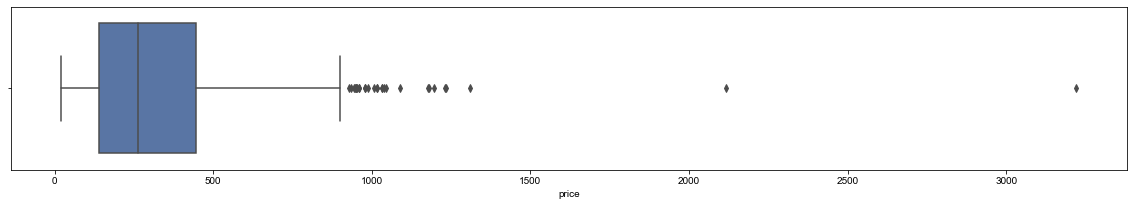

In [12]:
#Bedasarkan gambar dibawah data outlier ditunjukan denggan titik yang berada pada luar diagram dengan jumlah 28 outlier
plt.subplots(figsize=(20,3))
sns.set(rc={'figure.figsize':(8,11)})
sns.boxplot(x='price', data=df)

In [13]:
# Berikut ini merupakan nilai pada kolom perc_of_unit_sold yang tergolong data outlier/data yang menyimpang dari rata-rata
cari_outlier(df['perc_of_unit_sold'])

[]

In [14]:
#Berikut ini merupakan nilai - nilai pada kolom rating yang tergolong data outlier atau data yang menyimpan dari rata-rata
cari_outlier(df['rating'])

[60.0,
 20.0,
 60.0,
 60.0,
 56.0,
 60.0,
 40.0,
 60.0,
 20.0,
 60.0,
 60.0,
 60.0,
 40.0,
 60.0,
 50.0,
 40.0,
 40.0]

In [15]:
#Jumlah data outlier rating
outlier = cari_outlier(df['rating'])
len(outlier)

17

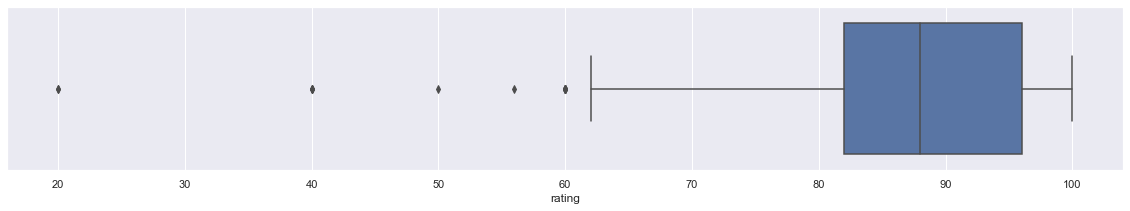

In [16]:
#Bedasarkan gambar dibawah data outlier ditunjukan denggan titik yang berada pada luar diagram dengan jumlah 17 outlier
plt.subplots(figsize=(20,3))
sns.set(rc={'figure.figsize':(8,11)})
sns.boxplot(x='rating', data=df)

In [17]:
#Berikut ini merupakan nilai - nilai pada kolom Original_price yang tergolong data outlier atau data yang menyimpan dari rata-rata
cari_outlier(df['Original_price'])

[2094.0,
 2990.0,
 2749.0,
 2865.0,
 2610.0,
 2420.0,
 2370.0,
 5481.0,
 3124.0,
 26220.0,
 3731.0,
 29970.0,
 2730.0,
 2202.0,
 2990.0,
 5870.0,
 2990.0,
 4316.0,
 2240.0,
 2243.0,
 2865.0,
 4481.0,
 4623.0,
 3749.0,
 5231.0,
 4490.0,
 5061.0,
 4031.0,
 3374.0,
 2240.0,
 2455.0,
 2960.0,
 5587.0,
 4110.0,
 2624.0]

In [18]:
#Jumlah data outlier Original_price
outlier = cari_outlier(df['Original_price'])
len(outlier)

35

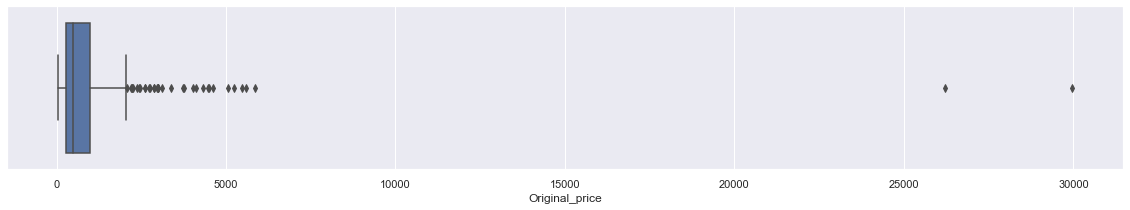

In [19]:
#Bedasarkan gambar dibawah data outlier ditunjukan denggan titik yang berada pada luar diagram dengan jumlah 35 outlier
plt.subplots(figsize=(20,3))
sns.set(rc={'figure.figsize':(8,11)})
sns.boxplot(x='Original_price', data=df)

## Visualization

'\nJika dilihat pada diagram dibahwa terlihat bahwa distrbusi pada kolom price terlihat normal \nkarena jika dilihat dari range price yang berada pada kisaran 0-3500 sangat mendominasi \ndan jika dilihat secara seksama garis menunjukan bell curve\n'

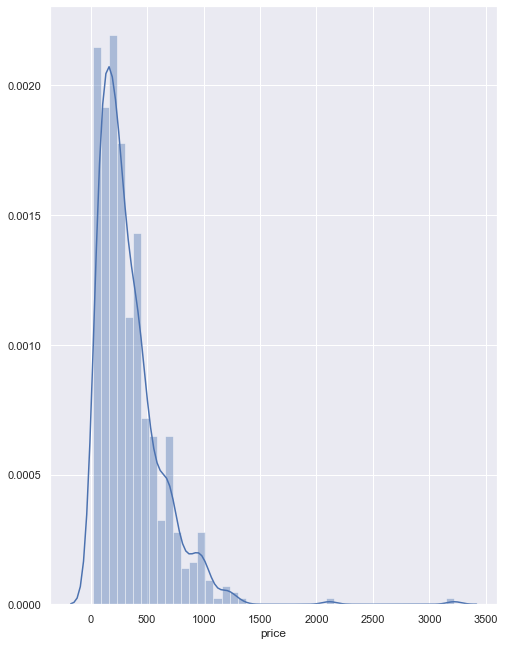

In [20]:
sns.set(rc={'figure.figsize':(8,11)})
sns.distplot(df['price'])

'''
Jika dilihat pada diagram dibahwa terlihat bahwa distrbusi pada kolom price terlihat normal 
karena jika dilihat dari range price yang berada pada kisaran 0-3500 sangat mendominasi 
dan jika dilihat secara seksama garis menunjukan bell curve
'''

'\nJika dilihat pada diagram dibawah, dapat dikatakann distubusi pada kolom perc_of_unit_sold dikatan normal karena \nsalah berbentuk bell curve\n'

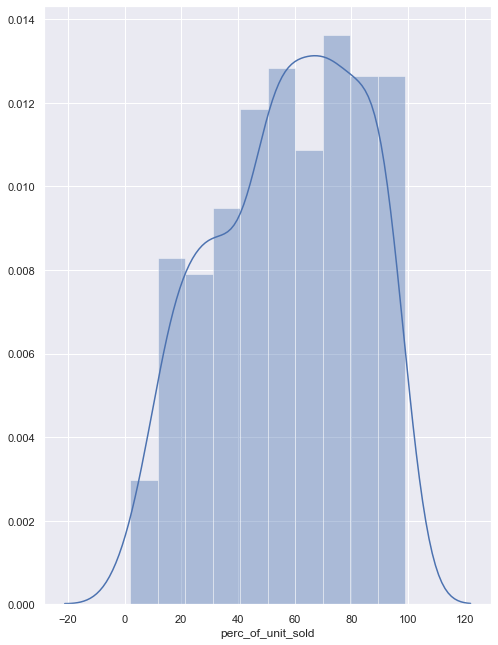

In [21]:
sns.set(rc={'figure.figsize':(8,11)})
sns.distplot(df['perc_of_unit_sold'])

'''
Jika dilihat pada diagram dibawah, dapat dikatakann distubusi pada kolom perc_of_unit_sold dikatan normal karena 
salah berbentuk bell curve
'''

'\nJika dilihat pada diagram dibawah, dapat dikatakann distubusi pada kolom Original_price dikatan normal karena \nnamun tidak terlalu terlihat bell curve pada diagram\n'

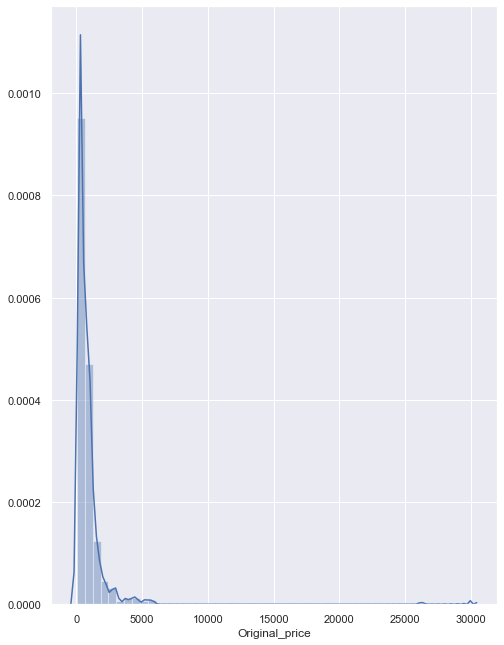

In [22]:
sns.set(rc={'figure.figsize':(8,11)})
sns.distplot(df['Original_price'])

'''
Jika dilihat pada diagram dibawah, dapat dikatakann distubusi pada kolom Original_price dikatan normal karena 
namun tidak terlalu terlihat bell curve pada diagram
'''

Text(0.5, 1, 'Corellation Between Features :  price,perc_of_unit_sold,rating,Original_price')

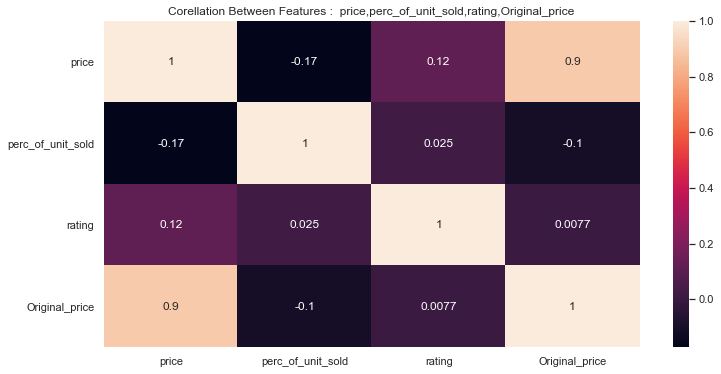

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df[['price','perc_of_unit_sold','rating','Original_price']].corr('spearman'), annot = True)
plt.title('Corellation Between Features :  price,perc_of_unit_sold,rating,Original_price')

## Business Insight

Pada diagram diatas menunjukan bahwa ketiga kolom tidak ada yang memiliki korelasi dengan nilai korelasi yang tidak mendekati angka 1. 
Hanya price dan Original_price dan hal tersebut wajar karena nilai dari Original_price adalah dasar dalam penentuan nilai price tersebut

Alasan mengunakan metodh spearman adalah data tidak terdistribusi normal untuk ketiga kolom.

Range korelasi dari 0 sampai 1, jika nilai mendekati 1 semakin kuat pula korelasinya, Artinya saat mendekati 1 fitur yang dibandingan dengan fitur lain sama-sama memiliki peranan kuat untuk mempengaruhi nilai satu sama lain. 